In [1]:
import numpy as np
from qiskit.visualization import *
from qiskit import *
%matplotlib inline

In [2]:
circ = QuantumCircuit(3)

In [3]:
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)

In [4]:
circ.draw()

┌───┐          
q_0: |0>┤ H ├──■────■──
        └───┘┌─┴─┐  │  
q_1: |0>─────┤ X ├──┼──
             └───┘┌─┴─┐
q_2: |0>──────────┤ X ├
                  └───┘

In [5]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
output = result.get_statevector(circ, decimals=3)
print(output)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


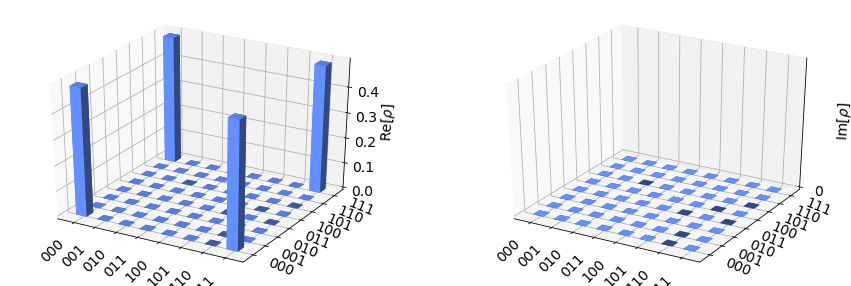

In [6]:
plot_state_city(output)

In [11]:
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
meas.measure(range(3), range(3))
qc = circ+meas
qc.draw()

┌───┐           ░ ┌─┐      
q_0: |0>┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: |0>─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: |0>──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
 c_0: 0 ═══════════════════╩══╬══╬═
                              ║  ║ 
 c_1: 0 ══════════════════════╩══╬═
                                 ║ 
 c_2: 0 ═════════════════════════╩═

In [14]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

{'000': 497, '111': 527}


In [15]:
IBMQ.save_account('')

In [16]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [20]:
provider = IBMQ.get_provider(group='open')

In [21]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [23]:
real_backend = provider.get_backend('ibmq_essex')
real_job = execute(qc, real_backend)

In [24]:
real_result = real_job.result()
real_counts = real_result.get_counts(qc)

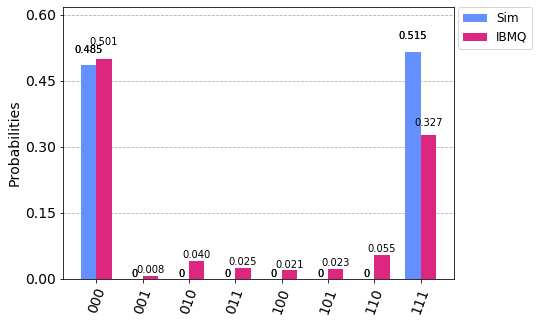

In [26]:
plot_histogram([counts, real_counts], legend = ['Sim', 'IBMQ'])

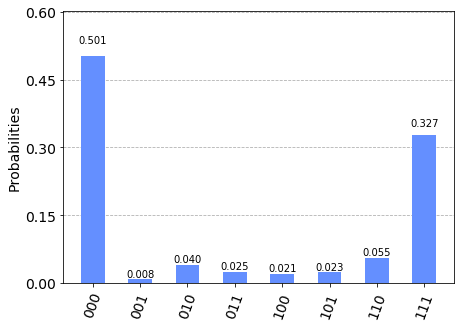

In [27]:
plot_histogram(real_counts)